In [1]:
# import dependencies

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st
from scipy.stats import linregress
from datetime import datetime
import calendar

In [2]:
# convert dataset to Pandas DataFrame and reduce columns to relevant information

data = pd.read_csv('Resources/COVID_staff_shortages.csv')
df = pd.DataFrame(data[['state', 'date', 'critical_staffing_shortage_today_yes', 'critical_staffing_shortage_today_no',
          'critical_staffing_shortage_today_not_reported', 'hospital_onset_covid', 'hospital_onset_covid_coverage',
          'inpatient_beds', 'inpatient_beds_used', 'inpatient_beds_used_covid', 'staffed_adult_icu_bed_occupancy',
          'staffed_icu_adult_patients_confirmed_covid', 'total_adult_patients_hospitalized_confirmed_covid',
          'total_pediatric_patients_hospitalized_confirmed_covid', 'total_staffed_adult_icu_beds',
          'inpatient_beds_utilization', 'percent_of_inpatients_with_covid', 'inpatient_bed_covid_utilization',
          'adult_icu_bed_covid_utilization', 'adult_icu_bed_utilization', 'geocoded_state', 'deaths_covid',
          'icu_patients_confirmed_influenza', 'total_patients_hospitalized_confirmed_influenza',
          'total_patients_hospitalized_confirmed_influenza_and_covid', 'all_pediatric_inpatient_bed_occupied',
          'staffed_icu_pediatric_patients_confirmed_covid', 'total_staffed_pediatric_icu_beds']])

## Hypotheses

### 1)  Month of Year  vs.  Shortages
        Null: There is no relationship between months of the year and critical staffing shortages.
        Alternative: There is a relationship between months of the year and critical staffing shortages.
        
### 2)  Week of Month  vs.  Shortages
        Null: There is no relationship between the week of the month and critical staffing shortages.
        Alternative: There is a relationship between the week of the month and critical staffing shortages.
        
### 3)  Day of Week  vs.  Shortages
        Null: There is no relationship between days of the week and critical staffing shortages.
        Alternative: There is a relationship between days of the week and critical staffing shortages.

# Cleaning the data:

In [3]:
df[['year', 'month','day']] = df['date'].str.split('/', 2, expand=True)
df

,state,date,critical_staffing_shortage_today_yes,critical_staffing_shortage_today_no,critical_staffing_shortage_today_not_reported,hospital_onset_covid,hospital_onset_covid_coverage,inpatient_beds,inpatient_beds_used,inpatient_beds_used_covid,...,deaths_covid,icu_patients_confirmed_influenza,total_patients_hospitalized_confirmed_influenza,total_patients_hospitalized_confirmed_influenza_and_covid,all_pediatric_inpatient_bed_occupied,staffed_icu_pediatric_patients_confirmed_covid,total_staffed_pediatric_icu_beds,year,month,day
0,ME,2021/01/23,1,30,8,3.0,38,3229.0,2231.0,219.0,...,1.0,0.0,1.0,3.0,174.0,NaN,60.0,2021,01,23
1,SD,2021/01/23,2,60,3,27.0,62,2868.0,1641.0,152.0,...,1.0,0.0,3.0,0.0,291.0,NaN,83.0,2021,01,23
2,MD,2021/01/22,2,57,1,31.0,59,11827.0,9635.0,2039.0,...,33.0,0.0,1.0,0.0,648.0,NaN,240.0,2021,01,22
3,RI,2021/01/22,6,8,1,6.0,14,2402.0,2445.0,399.0,...,6.0,0.0,0.0,1.0,635.0,NaN,93.0,2021,01,22
4,ID,2021/01/21,4,40,8,0.0,51,3694.0,2268.0,248.0,...,4.0,0.0,5.0,2.0,273.0,NaN,230.0,2021,01,21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54006,MT,2021/03/29,6,58,1,3.0,64,2938.0,1762.0,52.0,...,0.0,0.0,0.0,0.0,45.0,NaN,18.0,2021,03,29
54007,NJ,2021/03/09,9,61,8,76.0,77,21569.0,15395.0,2008.0,...,17.0,5.0,37.0,4.0,365.0,NaN,107.0,2021,03,09
54008,NM,2021/05/19,12,43,1,2.0,55,4446.0,3181.0,163.0,...,2.0,1.0,3.0,0.0,36.0,NaN,0.0,2021,05,19
54009,NE,2021/04/15,9,91,1,1.0,100,4368.0,2958.0,190.0,...,0.0,0.0,0.0,0.0,14.0,NaN,0.0,2021,04,15


In [4]:
sum_by_month = df.groupby(by=['year','month']).sum()
sum_by_month = sum_by_month.reset_index()
sum_by_month

,year,month,critical_staffing_shortage_today_yes,critical_staffing_shortage_today_no,critical_staffing_shortage_today_not_reported,hospital_onset_covid,hospital_onset_covid_coverage,inpatient_beds,inpatient_beds_used,inpatient_beds_used_covid,...,adult_icu_bed_covid_utilization,adult_icu_bed_utilization,geocoded_state,deaths_covid,icu_patients_confirmed_influenza,total_patients_hospitalized_confirmed_influenza,total_patients_hospitalized_confirmed_influenza_and_covid,all_pediatric_inpatient_bed_occupied,staffed_icu_pediatric_patients_confirmed_covid,total_staffed_pediatric_icu_beds
0,2020,01,80,220,286,165.0,503,63598.0,36635.0,9385.0,...,2.358804,5.080288,0.0,145.0,20.0,50.0,35.0,0.0,0.0,0.0
1,2020,02,0,0,361,0.0,284,24842.0,5652.0,77.0,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2020,03,0,6,12595,1110.0,6866,949142.0,447250.0,69345.0,...,0.000000,0.000000,0.0,1118.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2020,04,30,257,130950,20378.0,81524,13210995.0,7073575.0,1480053.0,...,0.384478,3.450187,0.0,33572.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2020,05,6,235,165222,32731.0,127751,18718506.0,11440308.0,1576600.0,...,0.000000,0.000000,0.0,54884.0,0.0,0.0,0.0,0.0,0.0,0.0
5,2020,06,48,442,162168,20757.0,123221,20533059.0,13007834.0,1285283.0,...,0.000000,0.000000,0.0,17541.0,0.0,0.0,0.0,0.0,0.0,0.0
6,2020,07,10034,39506,116819,29804.0,126571,19092938.0,12882143.0,2036275.0,...,137.683445,544.174369,0.0,19178.0,0.0,0.0,0.0,320759.0,2649.0,184189.0
7,2020,08,24221,107763,42211,31596.0,152334,22531750.0,15435042.0,1684290.0,...,246.766230,1075.241858,0.0,31259.0,2.0,2.0,14.0,718222.0,2863.0,389684.0
8,2020,09,25951,123922,24345,27736.0,158577,22895979.0,15726998.0,1153739.0,...,184.684305,1042.760588,0.0,15245.0,0.0,0.0,0.0,726308.0,2007.0,395270.0
9,2020,10,29044,144423,10750,33950.0,176062,24691856.0,17116934.0,1389500.0,...,227.658416,1115.281591,0.0,17964.0,584.0,3061.0,14082.0,865851.0,2161.0,472494.0


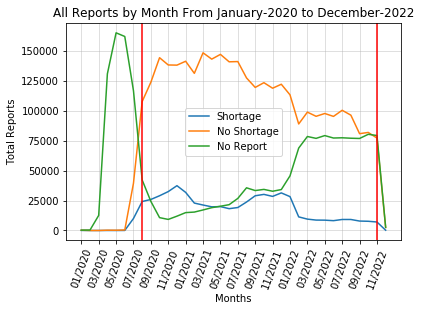

In [5]:
# plot ALL REPORTS for critical staffing shortage BY EACH MONTH from the dataset and save to png
plt.plot(sum_by_month['critical_staffing_shortage_today_yes'])
plt.plot(sum_by_month['critical_staffing_shortage_today_no'])
plt.plot(sum_by_month['critical_staffing_shortage_today_not_reported'])
plt.axvline(x=7, color='red')
plt.axvline(x=34, color='red')

plt.legend(['Shortage', 'No Shortage', 'No Report'])
plt.ylabel('Total Reports')
plt.xlabel('Months')
plt.title('All Reports by Month From {} to {}'.format(datetime.strptime(df['date'].min(), '%Y/%m/%d').strftime('%B-%Y'),
                                               datetime.strptime(df['date'].max(), '%Y/%m/%d').strftime('%B-%Y')
                                              ))
labels = []
for x in np.arange(0,36,2):
    labels.append('{}/{}'.format(sum_by_month['month'][x], sum_by_month['year'][x]))
labels.append('01/2023')
plt.xticks(ticks=np.arange(0,36, 2), labels=labels, rotation=70)
plt.grid(alpha=.5)

plt.savefig('output/1-1.png', bbox_inches='tight')
plt.show()

### The graph above indicates a lack of reports before August 2020 and after November 2022 (last month).

In [6]:
# drop the rows with insufficient data

sum_by_month = sum_by_month.drop([0,1,2,3,4,5,6,35]).reset_index(drop=True)

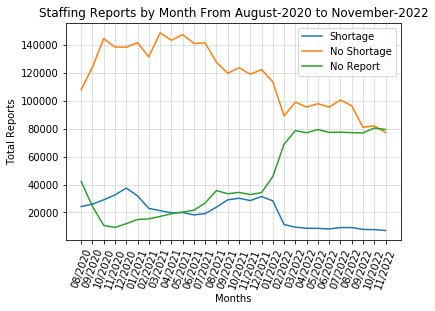

In [7]:
plt.plot(sum_by_month['critical_staffing_shortage_today_yes'])
plt.plot(sum_by_month['critical_staffing_shortage_today_no'])
plt.plot(sum_by_month['critical_staffing_shortage_today_not_reported'])
plt.legend(['Shortage', 'No Shortage', 'No Report'])
plt.ylabel('Total Reports')
plt.xlabel('Months')
plt.title('Staffing Reports by Month From {} to {}'.format(datetime.strptime(f"{sum_by_month['year'][0]} {sum_by_month['month'][0]}", '%Y %m').strftime('%B-%Y'),
                                                         datetime.strptime(f"{sum_by_month['year'][sum_by_month.index.max()]} {sum_by_month['month'][sum_by_month.index.max()]}", '%Y %m').strftime('%B-%Y')))
labels = []
for x in np.arange(0,28,1):
    labels.append('{}/{}'.format(sum_by_month['month'][x], sum_by_month['year'][x]))
plt.xticks(ticks=np.arange(0,28, 1), labels=labels, rotation=70)
plt.grid(alpha=.5)
plt.savefig('output/1-2.png', bbox_inches='tight')
plt.show()

## The reduced timespan appears more useful.

In [8]:
# Create dataframe for National Means by Date
mean_by_date = pd.DataFrame(df.groupby(by='date').mean().reset_index())
mean_by_date = mean_by_date.drop(np.arange(0, 213, 1)).reset_index(drop=True)
mean_by_date = mean_by_date.drop(mean_by_date.index.max()).reset_index()
mean_by_date

,index,date,critical_staffing_shortage_today_yes,critical_staffing_shortage_today_no,critical_staffing_shortage_today_not_reported,hospital_onset_covid,hospital_onset_covid_coverage,inpatient_beds,inpatient_beds_used,inpatient_beds_used_covid,...,adult_icu_bed_covid_utilization,adult_icu_bed_utilization,geocoded_state,deaths_covid,icu_patients_confirmed_influenza,total_patients_hospitalized_confirmed_influenza,total_patients_hospitalized_confirmed_influenza_and_covid,all_pediatric_inpatient_bed_occupied,staffed_icu_pediatric_patients_confirmed_covid,total_staffed_pediatric_icu_beds
0,0,2020/08/01,14.452830,59.547170,30.226415,28.830189,87.811321,13102.698113,8900.283019,1308.207547,...,0.170790,0.656779,NaN,24.792453,0.000000,0.000000,0.000000,487.769231,2.692308,245.884615
1,1,2020/08/02,14.018868,58.169811,31.528302,29.660377,86.509434,12917.811321,8567.830189,1295.867925,...,0.170307,0.648468,NaN,25.075472,0.000000,0.000000,0.000000,467.730769,2.500000,248.788462
2,2,2020/08/03,14.716981,59.396226,30.396226,19.226415,90.849057,13061.150943,8683.886792,1204.283019,...,0.167892,0.632093,NaN,24.301887,0.500000,0.500000,3.500000,431.500000,1.846154,245.750000
3,3,2020/08/04,14.679245,60.075472,29.981132,16.415094,91.169811,13294.075472,9264.528302,1205.773585,...,0.168942,0.662102,NaN,23.207547,0.000000,0.000000,0.000000,448.923077,2.076923,233.923077
4,4,2020/08/05,15.132075,60.584906,29.433962,31.358491,87.396226,13501.490566,9509.528302,1190.150943,...,0.169072,0.669785,NaN,25.075472,0.000000,0.000000,0.000000,469.134615,1.961538,244.352941
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
847,847,2022/11/26,4.407407,47.740741,48.259259,32.629630,97.703704,12884.629630,9407.240741,575.055556,...,0.046709,0.684937,NaN,2.500000,27.407407,211.481481,4.980392,527.851852,2.925926,171.537037
848,848,2022/11/27,4.407407,47.592593,48.074074,32.203704,97.333333,12890.685185,9565.592593,601.222222,...,0.049456,0.697329,NaN,2.346154,30.851852,236.481481,4.882353,531.166667,3.166667,171.574074
849,849,2022/11/28,4.574074,45.222222,48.777778,27.370370,95.851852,12832.944444,9772.722222,634.500000,...,0.051654,0.722167,NaN,2.500000,35.185185,267.222222,5.596154,537.722222,3.148148,171.685185
850,850,2022/11/29,4.611111,44.981481,49.296296,28.611111,96.500000,13021.944444,10332.870370,660.759259,...,0.051619,0.759682,NaN,2.826923,39.296296,289.740741,6.235294,569.111111,3.259259,173.018519


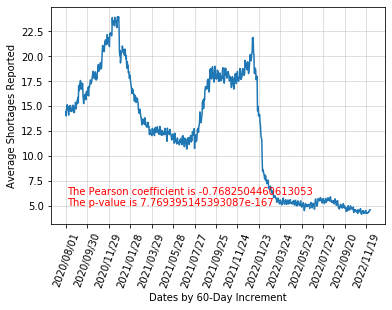

In [9]:
# Display reduced data for shortages across the timespan
plt.plot(mean_by_date['date'], mean_by_date['critical_staffing_shortage_today_yes'])
plt.xticks(ticks=np.arange(0, 883, 60), rotation=70)
plt.grid(alpha=.5)
plt.xlabel('Dates by 60-Day Increment')
plt.ylabel('Average Shortages Reported')
plt.annotate(f"""The Pearson coefficient is {st.pearsonr(mean_by_date['index'], mean_by_date['critical_staffing_shortage_today_yes'])[0]}
The p-value is {st.pearsonr(mean_by_date['index'], mean_by_date['critical_staffing_shortage_today_yes'])[1]}""", (5,5), color='red')
plt.savefig('output/1-3', bbox_inches='tight')
plt.show()

## Do National Staffing Shortages Reports show any difference between Seasons?

In [10]:
# create a column for 'season'
seasons = []
for x in mean_by_date['date']:
    month = x.split('/')[1]
    if month == '01' or month == '02' or month == '12':
        seasons.append('Winter')
    elif month == '03' or month == '04' or month == '05':
        seasons.append('Spring')
    elif month == '06' or month == '07' or month == '08':
        seasons.append('Summer')
    else:
        seasons.append('Fall')
mean_by_date.insert(1, 'season', seasons)
mean_by_date

,index,season,date,critical_staffing_shortage_today_yes,critical_staffing_shortage_today_no,critical_staffing_shortage_today_not_reported,hospital_onset_covid,hospital_onset_covid_coverage,inpatient_beds,inpatient_beds_used,...,adult_icu_bed_covid_utilization,adult_icu_bed_utilization,geocoded_state,deaths_covid,icu_patients_confirmed_influenza,total_patients_hospitalized_confirmed_influenza,total_patients_hospitalized_confirmed_influenza_and_covid,all_pediatric_inpatient_bed_occupied,staffed_icu_pediatric_patients_confirmed_covid,total_staffed_pediatric_icu_beds
0,0,Summer,2020/08/01,14.452830,59.547170,30.226415,28.830189,87.811321,13102.698113,8900.283019,...,0.170790,0.656779,NaN,24.792453,0.000000,0.000000,0.000000,487.769231,2.692308,245.884615
1,1,Summer,2020/08/02,14.018868,58.169811,31.528302,29.660377,86.509434,12917.811321,8567.830189,...,0.170307,0.648468,NaN,25.075472,0.000000,0.000000,0.000000,467.730769,2.500000,248.788462
2,2,Summer,2020/08/03,14.716981,59.396226,30.396226,19.226415,90.849057,13061.150943,8683.886792,...,0.167892,0.632093,NaN,24.301887,0.500000,0.500000,3.500000,431.500000,1.846154,245.750000
3,3,Summer,2020/08/04,14.679245,60.075472,29.981132,16.415094,91.169811,13294.075472,9264.528302,...,0.168942,0.662102,NaN,23.207547,0.000000,0.000000,0.000000,448.923077,2.076923,233.923077
4,4,Summer,2020/08/05,15.132075,60.584906,29.433962,31.358491,87.396226,13501.490566,9509.528302,...,0.169072,0.669785,NaN,25.075472,0.000000,0.000000,0.000000,469.134615,1.961538,244.352941
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
847,847,Fall,2022/11/26,4.407407,47.740741,48.259259,32.629630,97.703704,12884.629630,9407.240741,...,0.046709,0.684937,NaN,2.500000,27.407407,211.481481,4.980392,527.851852,2.925926,171.537037
848,848,Fall,2022/11/27,4.407407,47.592593,48.074074,32.203704,97.333333,12890.685185,9565.592593,...,0.049456,0.697329,NaN,2.346154,30.851852,236.481481,4.882353,531.166667,3.166667,171.574074
849,849,Fall,2022/11/28,4.574074,45.222222,48.777778,27.370370,95.851852,12832.944444,9772.722222,...,0.051654,0.722167,NaN,2.500000,35.185185,267.222222,5.596154,537.722222,3.148148,171.685185
850,850,Fall,2022/11/29,4.611111,44.981481,49.296296,28.611111,96.500000,13021.944444,10332.870370,...,0.051619,0.759682,NaN,2.826923,39.296296,289.740741,6.235294,569.111111,3.259259,173.018519


In [11]:
# Define a function to create Linear Regression plots
def linear_regression(x,y):
    result = linregress(x, y)
    print(f'The Coefficient of Determination (r squared) is {result.rvalue ** 2}')
    return plt.plot(x, result.intercept + result.slope*x, 'r', label='Linear Regression')
def linreg_annotation(x,y):
    result = linregress(x, y)
    return f'''y = {round(result.slope, 2)}x + {round(result.intercept, 2)}
    
R = {result.rvalue ** 2}'''

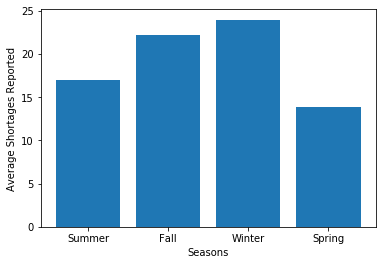

In [12]:
plt.bar(mean_by_date['season'], mean_by_date['critical_staffing_shortage_today_yes'])
plt.xlabel('Seasons')
plt.ylabel('Average Shortages Reported')
plt.savefig('output/1-4', bbox_inches='tight')
plt.show()

In [13]:
season_means = pd.DataFrame(mean_by_date.groupby(by='season').mean()).drop(columns='index')
season_means = season_means.reindex(['Spring','Summer','Fall','Winter']).reset_index()
season_means = season_means.reset_index()
season_means

,index,season,critical_staffing_shortage_today_yes,critical_staffing_shortage_today_no,critical_staffing_shortage_today_not_reported,hospital_onset_covid,hospital_onset_covid_coverage,inpatient_beds,inpatient_beds_used,inpatient_beds_used_covid,...,adult_icu_bed_covid_utilization,adult_icu_bed_utilization,geocoded_state,deaths_covid,icu_patients_confirmed_influenza,total_patients_hospitalized_confirmed_influenza,total_patients_hospitalized_confirmed_influenza_and_covid,all_pediatric_inpatient_bed_occupied,staffed_icu_pediatric_patients_confirmed_covid,total_staffed_pediatric_icu_beds
0,0,Spring,8.963971,74.418309,29.437753,18.267377,110.065223,14378.258973,10494.352773,568.770260,...,0.069877,0.679499,NaN,5.541682,2.811889,24.657821,2.006093,578.337939,2.311997,259.737997
1,1,Summer,9.782084,70.532860,31.043367,22.177477,107.078587,14174.257514,10457.973478,804.648691,...,0.096564,0.686461,NaN,8.145269,1.732036,14.004080,1.349519,586.477271,3.719717,270.356295
2,2,Fall,13.540115,68.957983,25.943967,22.750390,104.712312,14080.390774,10399.230311,938.417178,...,0.143492,0.718306,NaN,11.951176,3.344544,24.205686,4.491103,611.961350,2.131307,289.330857
3,3,Winter,16.985938,76.490486,19.741940,40.950070,110.475615,14575.558883,10886.401081,1928.837507,...,0.233296,0.741932,NaN,26.208931,2.249903,18.504498,7.297809,563.668339,3.058434,304.481658


In [14]:
chi_square_test_statistic, p_value = st.chisquare(season_means['critical_staffing_shortage_today_yes'])
print('chi_square_test_statistic is : ' + str(chi_square_test_statistic))
print('p_value : ' + str(p_value))
print(st.chi2.ppf(1-0.05, df=1))

chi_square_test_statistic is : 3.3254992232445324
p_value : 0.3441093669514483
3.841458820694124


The Coefficient of Determination (r squared) is 0.9449503575750052


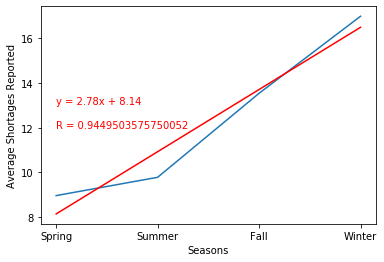

In [15]:
plt.plot(season_means['index'], season_means['critical_staffing_shortage_today_yes'])
linear_regression(season_means['index'], season_means['critical_staffing_shortage_today_yes'])
plt.annotate(linreg_annotation(season_means['index'], season_means['critical_staffing_shortage_today_yes']), (0,12), color='red')
plt.xticks([0,1,2,3], labels=list(season_means['season']))
plt.xlabel('Seasons')
plt.ylabel('Average Shortages Reported')
plt.savefig('output/1-5', bbox_inches='tight')
plt.show()

## Do National Staffing Shortages show any relationship with Day of the Year?

In [16]:
# create column for 'day of the year'
doy = []
for x in mean_by_date['date']:
    doy.append(datetime.strptime(f"{x}", "%Y/%m/%d").strftime("%j"))
mean_by_date.insert(1, 'Day of Year', doy)
mean_by_date

,index,Day of Year,season,date,critical_staffing_shortage_today_yes,critical_staffing_shortage_today_no,critical_staffing_shortage_today_not_reported,hospital_onset_covid,hospital_onset_covid_coverage,inpatient_beds,...,adult_icu_bed_covid_utilization,adult_icu_bed_utilization,geocoded_state,deaths_covid,icu_patients_confirmed_influenza,total_patients_hospitalized_confirmed_influenza,total_patients_hospitalized_confirmed_influenza_and_covid,all_pediatric_inpatient_bed_occupied,staffed_icu_pediatric_patients_confirmed_covid,total_staffed_pediatric_icu_beds
0,0,214,Summer,2020/08/01,14.452830,59.547170,30.226415,28.830189,87.811321,13102.698113,...,0.170790,0.656779,NaN,24.792453,0.000000,0.000000,0.000000,487.769231,2.692308,245.884615
1,1,215,Summer,2020/08/02,14.018868,58.169811,31.528302,29.660377,86.509434,12917.811321,...,0.170307,0.648468,NaN,25.075472,0.000000,0.000000,0.000000,467.730769,2.500000,248.788462
2,2,216,Summer,2020/08/03,14.716981,59.396226,30.396226,19.226415,90.849057,13061.150943,...,0.167892,0.632093,NaN,24.301887,0.500000,0.500000,3.500000,431.500000,1.846154,245.750000
3,3,217,Summer,2020/08/04,14.679245,60.075472,29.981132,16.415094,91.169811,13294.075472,...,0.168942,0.662102,NaN,23.207547,0.000000,0.000000,0.000000,448.923077,2.076923,233.923077
4,4,218,Summer,2020/08/05,15.132075,60.584906,29.433962,31.358491,87.396226,13501.490566,...,0.169072,0.669785,NaN,25.075472,0.000000,0.000000,0.000000,469.134615,1.961538,244.352941
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
847,847,330,Fall,2022/11/26,4.407407,47.740741,48.259259,32.629630,97.703704,12884.629630,...,0.046709,0.684937,NaN,2.500000,27.407407,211.481481,4.980392,527.851852,2.925926,171.537037
848,848,331,Fall,2022/11/27,4.407407,47.592593,48.074074,32.203704,97.333333,12890.685185,...,0.049456,0.697329,NaN,2.346154,30.851852,236.481481,4.882353,531.166667,3.166667,171.574074
849,849,332,Fall,2022/11/28,4.574074,45.222222,48.777778,27.370370,95.851852,12832.944444,...,0.051654,0.722167,NaN,2.500000,35.185185,267.222222,5.596154,537.722222,3.148148,171.685185
850,850,333,Fall,2022/11/29,4.611111,44.981481,49.296296,28.611111,96.500000,13021.944444,...,0.051619,0.759682,NaN,2.826923,39.296296,289.740741,6.235294,569.111111,3.259259,173.018519


In [17]:
# group dataframe by day of the year
doy_means = mean_by_date.groupby(by='Day of Year').mean().drop(columns='index').reset_index()
doy_means = doy_means.reset_index()
doy_means

,index,Day of Year,critical_staffing_shortage_today_yes,critical_staffing_shortage_today_no,critical_staffing_shortage_today_not_reported,hospital_onset_covid,hospital_onset_covid_coverage,inpatient_beds,inpatient_beds_used,inpatient_beds_used_covid,...,adult_icu_bed_covid_utilization,adult_icu_bed_utilization,geocoded_state,deaths_covid,icu_patients_confirmed_influenza,total_patients_hospitalized_confirmed_influenza,total_patients_hospitalized_confirmed_influenza_and_covid,all_pediatric_inpatient_bed_occupied,staffed_icu_pediatric_patients_confirmed_covid,total_staffed_pediatric_icu_beds
0,0,001,19.438155,81.680294,14.891684,44.991789,113.278302,14742.817435,10603.160901,2192.287037,...,0.259504,0.732926,NaN,31.291055,2.893781,25.684137,9.158980,642.922963,0.041667,392.070741
1,1,002,19.860412,81.776380,14.373340,44.155660,113.250175,14717.686583,10538.899720,2262.217331,...,0.262936,0.728161,NaN,29.709469,2.957722,25.732879,9.128057,616.219630,0.000000,387.257407
2,2,003,20.280748,76.875262,13.455276,42.680818,107.860762,14229.913522,10353.367226,2347.761006,...,0.267926,0.738095,NaN,32.268344,2.983927,26.569008,9.859888,568.176296,0.000000,388.832222
3,3,004,20.373340,72.120370,13.335080,42.735150,103.078267,13848.796820,10345.617925,2426.832285,...,0.270990,0.749930,NaN,32.853599,3.323375,25.057652,9.265549,541.169259,0.000000,386.970741
4,4,005,21.124389,76.970300,13.150070,47.645178,108.512404,14423.014500,11018.918064,2509.943222,...,0.273118,0.763036,NaN,36.006464,2.985325,23.051363,10.171558,632.948148,0.000000,396.845556
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
361,361,362,21.619846,75.375087,13.539832,35.590671,107.774808,14219.105695,10139.369147,2018.394654,...,0.258498,0.730886,NaN,29.159853,2.567610,25.674878,9.237771,572.832593,0.200000,384.632963
362,362,363,21.470825,76.429944,13.241614,36.922082,108.419637,14304.177149,10465.553459,2089.852900,...,0.262953,0.739578,NaN,32.545423,2.725367,26.181866,10.113382,609.825556,0.200000,388.671852
363,363,364,20.262579,76.832110,14.075821,39.709119,108.438679,14377.131377,10758.477987,2148.678546,...,0.262361,0.749102,NaN,32.019916,2.808001,26.284591,9.694794,617.518148,0.800000,385.306667
364,364,365,19.870894,82.781272,13.320231,43.634871,113.297170,14828.794899,11076.831936,2199.395003,...,0.261229,0.746535,NaN,32.351502,2.705451,28.505765,9.498253,661.159630,0.200000,388.215185


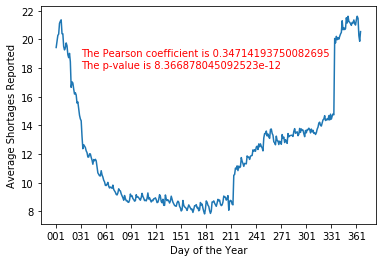

The Pearson coefficient is 0.34714193750082695
The p-value is 8.366878045092523e-12


In [18]:
plt.plot(doy_means['Day of Year'], doy_means['critical_staffing_shortage_today_yes'])
plt.xticks(np.arange(0, 367, 30))
plt.xlabel('Day of the Year')
plt.ylabel('Average Shortages Reported')
plt.annotate(f"""The Pearson coefficient is {st.pearsonr(doy_means['index'] +1, doy_means['critical_staffing_shortage_today_yes'])[0]}
The p-value is {st.pearsonr(doy_means['index'] +1, doy_means['critical_staffing_shortage_today_yes'])[1]}""", (30,18), color='red')
plt.savefig('output/1-6', bbox_inches='tight')
plt.show()
print(f"""The Pearson coefficient is {st.pearsonr(doy_means['index'] +1, doy_means['critical_staffing_shortage_today_yes'])[0]}
The p-value is {st.pearsonr(doy_means['index'] +1, doy_means['critical_staffing_shortage_today_yes'])[1]}""")

## Do National Staffing Shortages show any difference between Days of the Week?

In [19]:
# create column for 'day of the week'
dow = []
for x in mean_by_date['date']:
    weekday = datetime.strptime(x, '%Y/%m/%d').strftime('%A')
    dow.append(weekday)
mean_by_date.insert(1, 'Day of Week', dow)

In [20]:
dow_means = mean_by_date.groupby(by='Day of Week').mean().drop(columns='index')
dow_means = dow_means.reindex(['Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday', 'Monday', 'Tuesday']).reset_index()
dow_means = dow_means.reset_index()
dow_means

,index,Day of Week,critical_staffing_shortage_today_yes,critical_staffing_shortage_today_no,critical_staffing_shortage_today_not_reported,hospital_onset_covid,hospital_onset_covid_coverage,inpatient_beds,inpatient_beds_used,inpatient_beds_used_covid,...,adult_icu_bed_covid_utilization,adult_icu_bed_utilization,geocoded_state,deaths_covid,icu_patients_confirmed_influenza,total_patients_hospitalized_confirmed_influenza,total_patients_hospitalized_confirmed_influenza_and_covid,all_pediatric_inpatient_bed_occupied,staffed_icu_pediatric_patients_confirmed_covid,total_staffed_pediatric_icu_beds
0,0,Wednesday,12.530722,74.986219,25.919221,27.226117,110.075045,14568.510763,11006.964845,1047.991838,...,0.134948,0.721336,NaN,12.965677,2.783647,22.022196,3.868782,626.905834,2.766398,281.930038
1,1,Thursday,12.518276,74.027534,27.121446,25.933180,110.226126,14572.857333,10991.249568,1043.081775,...,0.134744,0.719708,NaN,12.925021,2.480941,20.009864,3.709937,626.374398,2.713769,281.285752
2,2,Friday,12.554167,73.951525,27.214928,26.298130,110.322323,14551.290328,10890.026841,1031.696317,...,0.133774,0.715004,NaN,12.771582,2.489043,20.155401,3.627058,623.850765,2.759747,281.877678
3,3,Saturday,12.226444,74.328152,27.016098,25.951289,110.065393,14470.408593,10534.813812,1017.055135,...,0.133244,0.700928,NaN,12.414413,2.485231,19.887711,3.676004,615.654128,2.780816,283.833982
4,4,Sunday,12.198402,74.306357,26.995976,25.808726,109.948769,14402.062833,10309.953145,1021.484870,...,0.134216,0.686421,NaN,11.979586,2.520637,20.248462,3.630075,595.185035,2.753599,283.668030
5,5,Monday,12.180302,66.756475,26.114720,23.523181,101.593724,13633.614711,9817.582088,1033.192443,...,0.136082,0.690844,NaN,12.602501,2.637343,20.336424,3.884149,503.646348,2.704603,278.434082
6,6,Tuesday,12.115553,66.556277,26.350881,23.648354,101.592535,13717.127934,10218.660143,1044.076437,...,0.136055,0.714093,NaN,12.676282,2.740768,21.004233,3.884990,525.455368,2.727709,278.442410


The Coefficient of Determination (r squared) is 0.8327570900365785


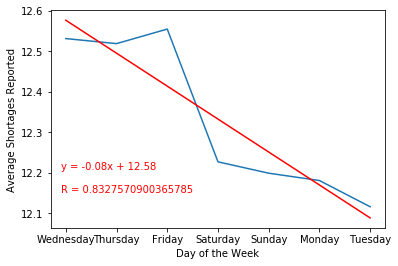

In [21]:
plt.plot(dow_means['index'], dow_means['critical_staffing_shortage_today_yes'])
linear_regression(dow_means['index'], dow_means['critical_staffing_shortage_today_yes'])
plt.annotate(linreg_annotation(dow_means['index'], dow_means['critical_staffing_shortage_today_yes']), (-.1,12.15), color='red')
plt.xticks([0,1,2,3,4,5,6], labels=list(dow_means['Day of Week']))
plt.xlabel('Day of the Week')
plt.ylabel('Average Shortages Reported')
plt.savefig('output/1-7', bbox_inches='tight')
plt.show()